# ML Benchmark
**Authors** 
Christopher Metzler, Shehani, Deverell, Malachi Buchheit, Bailey Trip

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("exploratory.csv", na_values = "?", sep=',', skipinitialspace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19055 entries, 0 to 19054
Data columns (total 62 columns):
 #   Column                                                                          Non-Null Count  Dtype 
---  ------                                                                          --------------  ----- 
 0   Agency Name                                                                     19055 non-null  object
 1   State Name [District] Latest available year                                     19049 non-null  object
 2   Agency Type [District] 2017-18                                                  19051 non-null  object
 3   Agency Type [District] 2016-17                                                  19051 non-null  object
 4   Agency Type [District] 2015-16                                                  19051 non-null  object
 5   School District Level Code (SCHLEV) [District Finance] 2017-18                  19051 non-null  object
 6   School District Level 

In [3]:
#Check for NA values
print(df.isna().sum())
#drop existing NA values
df.fillna(value=0,inplace=True)

Agency Name                                                                0
State Name [District] Latest available year                                6
Agency Type [District] 2017-18                                             4
Agency Type [District] 2016-17                                             4
Agency Type [District] 2015-16                                             4
                                                                          ..
Local Rev. - Property Taxes (T06) [District Finance] 2016-17               4
Local Rev. - Property Taxes (T06) [District Finance] 2015-16               4
Federal Rev. - Federal Title I Revenue (C14) [District Finance] 2017-18    4
Federal Rev. - Federal Title I Revenue (C14) [District Finance] 2016-17    4
Federal Rev. - Federal Title I Revenue (C14) [District Finance] 2015-16    4
Length: 62, dtype: int64


In [4]:
#Verify Results
print(df.isna().sum())

Agency Name                                                                0
State Name [District] Latest available year                                0
Agency Type [District] 2017-18                                             0
Agency Type [District] 2016-17                                             0
Agency Type [District] 2015-16                                             0
                                                                          ..
Local Rev. - Property Taxes (T06) [District Finance] 2016-17               0
Local Rev. - Property Taxes (T06) [District Finance] 2015-16               0
Federal Rev. - Federal Title I Revenue (C14) [District Finance] 2017-18    0
Federal Rev. - Federal Title I Revenue (C14) [District Finance] 2016-17    0
Federal Rev. - Federal Title I Revenue (C14) [District Finance] 2015-16    0
Length: 62, dtype: int64


In [5]:
#Split the data into years 2015-16, 2016-17 and 2017-18
years_15_16 = df[['Agency Name', 'State Name [District] Latest available year', 'Agency Type [District] 2015-16', 'School District Level Code (SCHLEV) [District Finance] 2015-16', 'Urban-centric Locale [District] 2015-16','Total Students All Grades (Includes AE) [District] 2015-16','American Indian/Alaska Native Students [District] 2015-16', 'Hispanic Students [District] 2015-16','Asian or Asian/Pacific Islander Students [District] 2015-16','Black or African American Students [District] 2015-16','White Students [District] 2015-16','Two or More Races Students [District] 2015-16','Nat. Hawaiian or Other Pacific Isl. Students [District] 2015-16','Total Race/Ethnicity [District] 2015-16','Pupil/Teacher Ratio [District] 2015-16','Total Staff [District] 2015-16','Total General Revenue (TOTALREV) [District Finance] 2015-16','Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2015-16','Long Term Debt - Outstanding Beginning of FY (_19H) [District Finance] 2015-16','State Rev. - General Formula Assistance (C01) [District Finance] 2015-16','Local Rev. - Property Taxes (T06) [District Finance] 2015-16','Federal Rev. - Federal Title I Revenue (C14) [District Finance] 2015-16']].copy()
#years_15_16.info()

years_16_17 = df[['Agency Name', 'State Name [District] Latest available year', 'Agency Type [District] 2016-17', 'School District Level Code (SCHLEV) [District Finance] 2016-17', 'Urban-centric Locale [District] 2016-17','Total Students All Grades (Includes AE) [District] 2016-17','American Indian/Alaska Native Students [District] 2016-17', 'Hispanic Students [District] 2016-17','Asian or Asian/Pacific Islander Students [District] 2016-17','Black or African American Students [District] 2016-17','White Students [District] 2016-17','Two or More Races Students [District] 2016-17','Nat. Hawaiian or Other Pacific Isl. Students [District] 2016-17','Total Race/Ethnicity [District] 2016-17','Pupil/Teacher Ratio [District] 2016-17','Total Staff [District] 2016-17','Total General Revenue (TOTALREV) [District Finance] 2016-17','Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2016-17','Long Term Debt - Outstanding Beginning of FY (_19H) [District Finance] 2016-17','State Rev. - General Formula Assistance (C01) [District Finance] 2016-17','Local Rev. - Property Taxes (T06) [District Finance] 2016-17','Federal Rev. - Federal Title I Revenue (C14) [District Finance] 2016-17']].copy()
#years_16_17.info()

years_17_18 = df[['Agency Name', 'State Name [District] Latest available year', 'Agency Type [District] 2017-18', 'School District Level Code (SCHLEV) [District Finance] 2017-18', 'Urban-centric Locale [District] 2017-18','Total Students All Grades (Includes AE) [District] 2017-18','American Indian/Alaska Native Students [District] 2017-18', 'Hispanic Students [District] 2017-18','Asian or Asian/Pacific Islander Students [District] 2017-18','Black or African American Students [District] 2017-18','White Students [District] 2017-18','Two or More Races Students [District] 2017-18','Nat. Hawaiian or Other Pacific Isl. Students [District] 2017-18','Total Race/Ethnicity [District] 2017-18','Pupil/Teacher Ratio [District] 2017-18','Total Staff [District] 2017-18','Total General Revenue (TOTALREV) [District Finance] 2017-18','Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2017-18','Long Term Debt - Outstanding Beginning of FY (_19H) [District Finance] 2017-18','State Rev. - General Formula Assistance (C01) [District Finance] 2017-18','Local Rev. - Property Taxes (T06) [District Finance] 2017-18','Federal Rev. - Federal Title I Revenue (C14) [District Finance] 2017-18']].copy()
years_17_18.describe()

Agency Name State Name [District] Latest available year  \
count                      19055                                       19055   
unique                     18511                                          97   
top     DISCOVERY CHARTER SCHOOL                                       Texas   
freq                           6                                        1243   

                           Agency Type [District] 2017-18  \
count                                               19055   
unique                                                 11   
top     1-Regular local school district that is NOT a ...   
freq                                                13147   

       School District Level Code (SCHLEV) [District Finance] 2017-18  \
count                                               19055               
unique                                                  8               
top              ="03-Elementary/secondary school system"               
freq                                                11393               

       Urban-centric Locale [District] 2017-18  \
count                                    19055   
unique                                      14   
top                           21-Suburb: Large   
freq                                      3416   

       Total Students All Grades (Includes AE) [District] 2017-18  \
count                                               19055           
unique                                               5525           
top                                                     †           
freq                                                 1561           

       American Indian/Alaska Native Students [District] 2017-18  \
count                                               19055          
unique                                                547          
top                                                  ="0"          
freq                                                 3017          

       Hispanic Students [District] 2017-18  \
count                                 19055   
unique                                 2526   
top                                       †   
freq                                   1561   

       Asian or Asian/Pacific Islander Students [District] 2017-18  \
count                                               19055            
unique                                               1195            
top                                                  ="0"            
freq                                                 2814            

       Black or African American Students [District] 2017-18  ...  \
count                                               19055     ...   
unique                                               1979     ...   
top                                                  ="0"     ...   
freq                                                 1743     ...   

       Nat. Hawaiian or Other Pacific Isl. Students [District] 2017-18  \
count                                               19055                
unique                                                260                
top                                                  ="0"                
freq                                                 5397                

       Total Race/Ethnicity [District] 2017-18  \
count                                    19055   
unique                                    5514   
top                                       ="0"   
freq                                      1619   

       Pupil/Teacher Ratio [District] 2017-18 Total Staff [District] 2017-18  \
count                                   19055                          19055   
unique                                   2350                          12674   
top                                         †                              –   
freq                                     2763                           1185   

       Total General Revenue (TOTALREV) [District Fina

Begin data normalization on the remaining columns:

In [6]:
#Set real labels
realcol_2015_16 = ['Total Students All Grades (Includes AE) [District] 2015-16','American Indian/Alaska Native Students [District] 2015-16', 'Hispanic Students [District] 2015-16','Asian or Asian/Pacific Islander Students [District] 2015-16','Black or African American Students [District] 2015-16','White Students [District] 2015-16','Two or More Races Students [District] 2015-16','Nat. Hawaiian or Other Pacific Isl. Students [District] 2015-16','Total Race/Ethnicity [District] 2015-16','Pupil/Teacher Ratio [District] 2015-16','Total Staff [District] 2015-16','Total General Revenue (TOTALREV) [District Finance] 2015-16','Long Term Debt - Outstanding Beginning of FY (_19H) [District Finance] 2015-16','State Rev. - General Formula Assistance (C01) [District Finance] 2015-16','Local Rev. - Property Taxes (T06) [District Finance] 2015-16','Federal Rev. - Federal Title I Revenue (C14) [District Finance] 2015-16']
realcol_2016_17 = ['Total Students All Grades (Includes AE) [District] 2016-17','American Indian/Alaska Native Students [District] 2016-17', 'Hispanic Students [District] 2016-17','Asian or Asian/Pacific Islander Students [District] 2016-17','Black or African American Students [District] 2016-17','White Students [District] 2016-17','Two or More Races Students [District] 2016-17','Nat. Hawaiian or Other Pacific Isl. Students [District] 2016-17','Total Race/Ethnicity [District] 2016-17','Pupil/Teacher Ratio [District] 2016-17','Total Staff [District] 2016-17','Total General Revenue (TOTALREV) [District Finance] 2016-17','Long Term Debt - Outstanding Beginning of FY (_19H) [District Finance] 2016-17','State Rev. - General Formula Assistance (C01) [District Finance] 2016-17','Local Rev. - Property Taxes (T06) [District Finance] 2016-17','Federal Rev. - Federal Title I Revenue (C14) [District Finance] 2016-17']
realcol_2017_18 = ['Total Students All Grades (Includes AE) [District] 2017-18','American Indian/Alaska Native Students [District] 2017-18', 'Hispanic Students [District] 2017-18','Asian or Asian/Pacific Islander Students [District] 2017-18','Black or African American Students [District] 2017-18','White Students [District] 2017-18','Two or More Races Students [District] 2017-18','Nat. Hawaiian or Other Pacific Isl. Students [District] 2017-18','Total Race/Ethnicity [District] 2017-18','Pupil/Teacher Ratio [District] 2017-18','Total Staff [District] 2017-18','Total General Revenue (TOTALREV) [District Finance] 2017-18','Long Term Debt - Outstanding Beginning of FY (_19H) [District Finance] 2017-18','State Rev. - General Formula Assistance (C01) [District Finance] 2017-18','Local Rev. - Property Taxes (T06) [District Finance] 2017-18','Federal Rev. - Federal Title I Revenue (C14) [District Finance] 2017-18']

#Continue cleaning data to account for uninterpretable strings
years_15_16[realcol_2015_16] = years_15_16[realcol_2015_16].apply(pd.to_numeric, errors='coerce') #Converts uninterpretable data into NaN's
#years_15_16.fillna(years_15_16[realcol_2015_16].mean(), inplace=True) #Convert NaN's into  mean
years_15_16.fillna(0, inplace=True) #Convert NaN's into interpretable data
#print(years_15_16.head(25))

years_16_17[realcol_2016_17] = years_16_17[realcol_2016_17].apply(pd.to_numeric, errors='coerce') #Converts uninterpretable data into NaN's
#years_16_17.fillna(years_16_17[realcol_2016_17].mean(), inplace=True) #Convert NaN's into  mean
years_16_17.fillna(0, inplace=True) #Convert NaN's into interpretable data
#print(years_16_17.head(5))

years_17_18[realcol_2017_18] = years_17_18[realcol_2017_18].apply(pd.to_numeric, errors='coerce') #Converts uninterpretable data into NaN's
#years_17_18.fillna(years_17_18[realcol_2017_18].mean(), inplace=True) #Convert NaN's into  mean
years_17_18.fillna(0, inplace=True) #Convert NaN's into interpretable data
#print(years_17_18.head(5))

In [7]:
years_15_16['Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2015-16'] = years_15_16['Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2015-16'].apply(pd.to_numeric, errors='coerce') #Converts uninterpretable data into NaN's
years_15_16.fillna(0, inplace=True) #Convert NaN's into interpretable data
years_15_16['cStrict Poverty'] = years_15_16['Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2015-16'] < 10000
years_15_16['bHigh Poverty'] = years_15_16['Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2015-16'] < 15000
years_15_16['aNo Poverty'] = years_15_16['Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2015-16'] > 15000
years_15_16['bHigh Poverty'].where(years_15_16['cStrict Poverty'] == False, other=False, inplace=True)
years_15_16['bHigh Poverty'].fillna(value=False, inplace=True)
years_15_16['Poverty Level'] = years_15_16.loc[:,['cStrict Poverty', 'bHigh Poverty', 'aNo Poverty']].eq(True).idxmax(axis=1).astype('category').cat.codes
years_15_16.drop(labels=['Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2015-16','cStrict Poverty','bHigh Poverty','aNo Poverty'], axis=1, inplace=True)


years_16_17['Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2016-17'] = years_16_17['Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2016-17'].apply(pd.to_numeric, errors='coerce') #Converts uninterpretable data into NaN's
years_16_17.fillna(0, inplace=True) #Convert NaN's into interpretable data
years_16_17['cStrict Poverty'] = years_16_17['Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2016-17'] < 10000
years_16_17['bHigh Poverty'] = years_16_17['Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2016-17'] < 15000
years_16_17['aNo Poverty'] = years_16_17['Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2016-17'] > 15000
years_16_17['bHigh Poverty'].where(years_16_17['cStrict Poverty'] == False, other=False, inplace=True)
years_16_17['bHigh Poverty'].fillna(value=False, inplace=True)
years_16_17['Poverty Level'] = years_16_17.loc[:,['cStrict Poverty', 'bHigh Poverty', 'aNo Poverty']].eq(True).idxmax(axis=1).astype('category').cat.codes
years_16_17.drop(labels=['Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2016-17','cStrict Poverty','bHigh Poverty','aNo Poverty'], axis=1, inplace=True)


years_17_18['Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2017-18'] = years_17_18['Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2017-18'].apply(pd.to_numeric, errors='coerce') #Converts uninterpretable data into NaN's
years_17_18.fillna(0, inplace=True) #Convert NaN's into interpretable data
years_17_18['cStrict Poverty'] = years_17_18['Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2017-18'] < 10000
years_17_18['bHigh Poverty'] = years_17_18['Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2017-18'] < 15000
years_17_18['aNo Poverty'] = years_17_18['Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2017-18'] > 15000
years_17_18['bHigh Poverty'].where(years_17_18['cStrict Poverty'] == False, other=False, inplace=True)
years_17_18['bHigh Poverty'].fillna(value=False, inplace=True)
years_17_18['Poverty Level'] = years_17_18.loc[:,['cStrict Poverty', 'bHigh Poverty', 'aNo Poverty']].eq(True).idxmax(axis=1).astype('category').cat.codes
years_17_18.drop(labels=['Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2017-18','cStrict Poverty','bHigh Poverty','aNo Poverty'], axis=1, inplace=True)


print(years_15_16.describe())

       Total Students All Grades (Includes AE) [District] 2015-16  \
count                                       19055.000000            
mean                                         2640.407557            
std                                         10440.310226            
min                                             0.000000            
25%                                           177.000000            
50%                                           626.000000            
75%                                          1974.000000            
max                                        639337.000000            

       American Indian/Alaska Native Students [District] 2015-16  \
count                                       19055.000000           
mean                                           26.648071           
std                                           166.306554           
min                                             0.000000           
25%                                   

In [8]:
#Begin normalization for 2015-2016
for col in realcol_2015_16:
    mean = years_15_16[col].mean()
    std = years_15_16[col].std()
    years_15_16[col] = (years_15_16[col] - mean)/std

#Begin normalization for 2016-2017
for col in realcol_2016_17:
    mean = years_16_17[col].mean()
    std = years_16_17[col].std()
    years_16_17[col] = (years_16_17[col] - mean)/std

#Begin normalization for 2017-2018
for col in realcol_2017_18:
    mean = years_17_18[col].mean()
    std = years_17_18[col].std()
    years_17_18[col] = (years_17_18[col] - mean)/std

<AxesSubplot:>

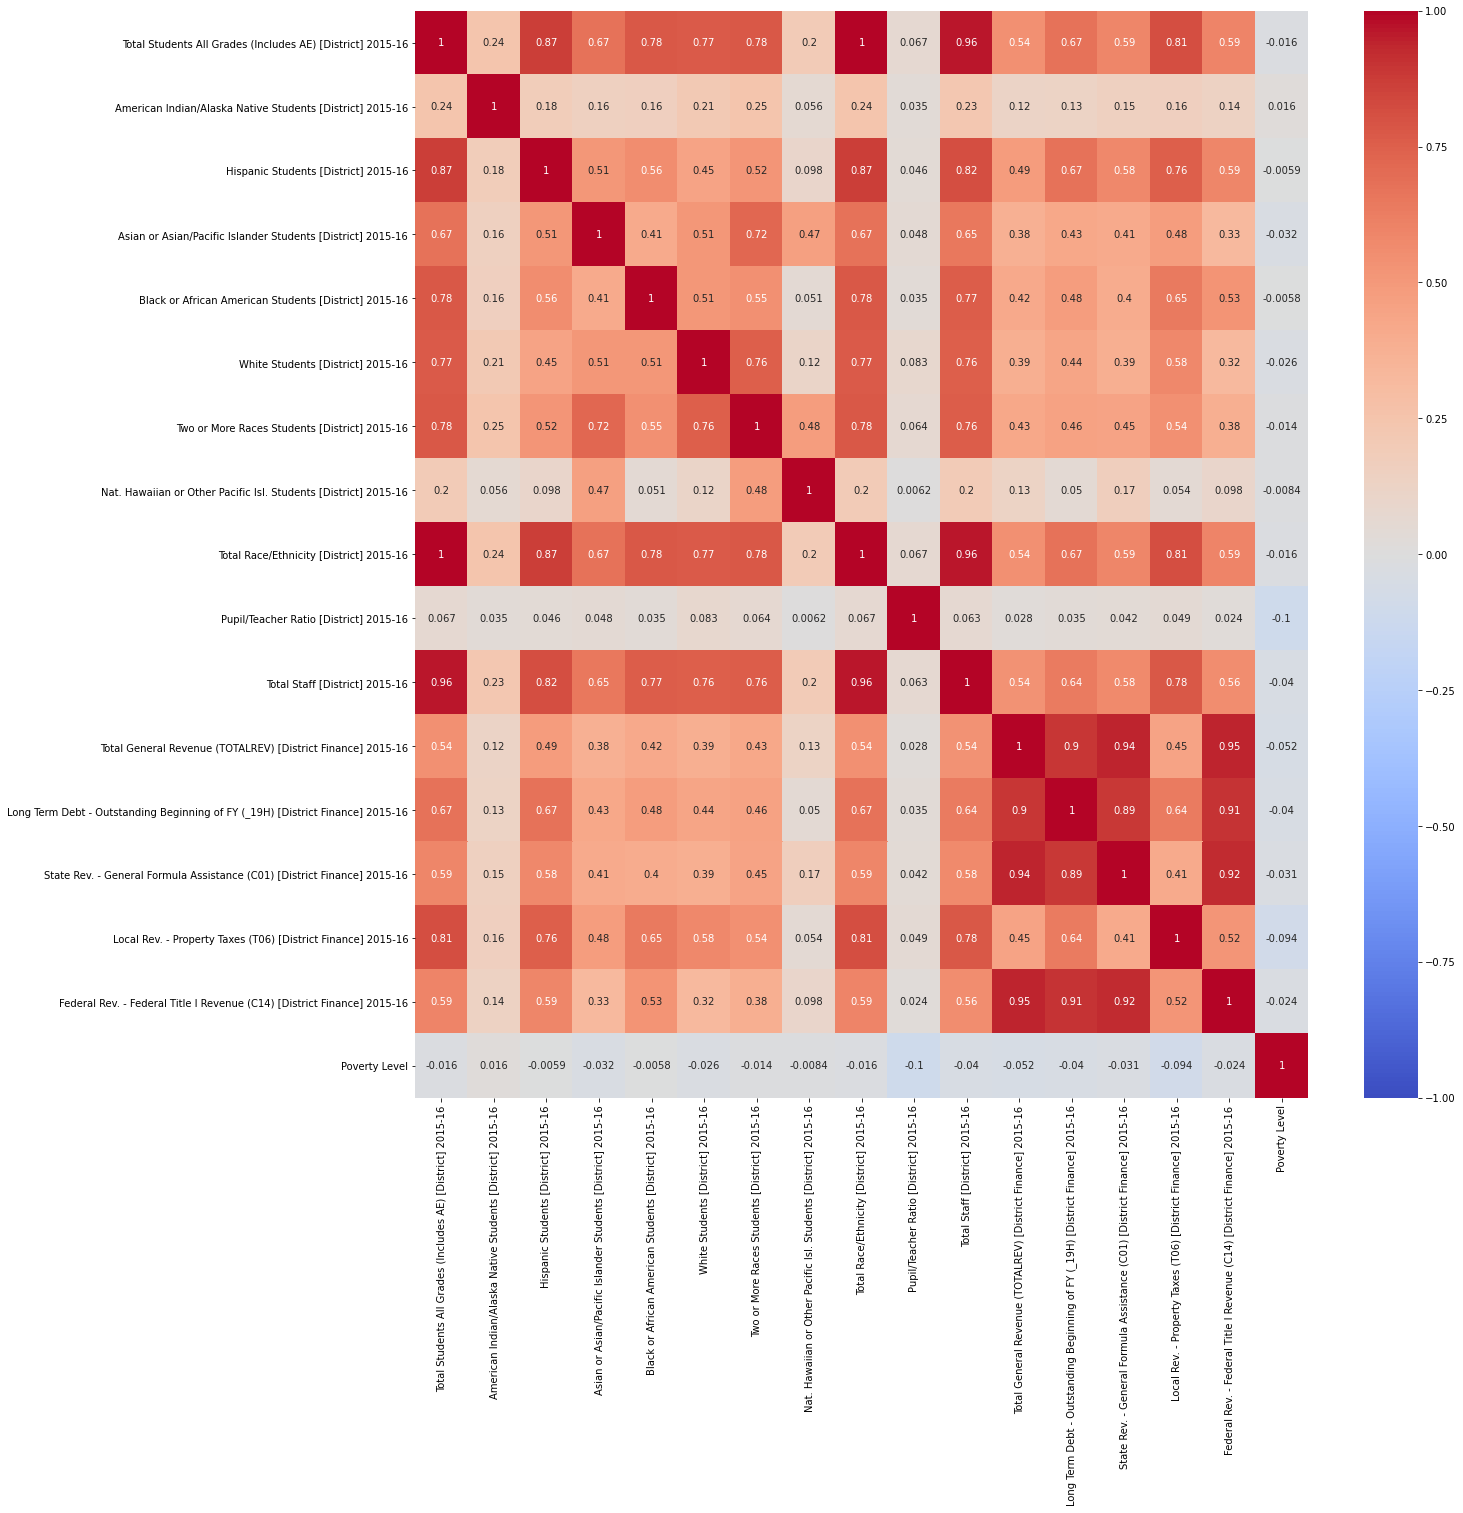

In [9]:
plt.figure(figsize=(20,20))
#sns.pairplot(years_15_16)
sns.heatmap(years_15_16.corr(),annot=True,cmap='coolwarm',vmin=-1)
#sns.heatmap(years_16_17.corr(),annot=True,cmap='coolwarm',vmin=-1)
#sns.heatmap(years_17_18.corr(),annot=True,cmap='coolwarm',vmin=-1)

Set catagorical columns into dummy variables.

In [10]:
col_2015_16 = ["Agency Type [District] 2015-16", "School District Level Code (SCHLEV) [District Finance] 2015-16", "Urban-centric Locale [District] 2015-16"]
col_2016_17 = ["Agency Type [District] 2016-17", "School District Level Code (SCHLEV) [District Finance] 2016-17", "Urban-centric Locale [District] 2016-17"]
col_2017_18 = ["Agency Type [District] 2017-18", "School District Level Code (SCHLEV) [District Finance] 2017-18", "Urban-centric Locale [District] 2017-18"]

years_15_16 = pd.get_dummies(years_15_16, columns=col_2015_16)
years_16_17 = pd.get_dummies(years_16_17, columns=col_2016_17)
years_17_18 = pd.get_dummies(years_17_18, columns=col_2017_18)

#years_15_16.join(pd.get_dummies(years_15_16['Urban-centric Locale [District] 2015-16']))
#years_15_16.drop('Urban-centric Locale [District] 2015-16', inplace=True, axis=1)

#years_16_17.join(pd.get_dummies(years_16_17['Urban-centric Locale [District] 2016-17']))
#years_16_17.drop('Urban-centric Locale [District] 2016-17', inplace=True, axis=1)

#years_17_18.join(pd.get_dummies(years_17_18['Urban-centric Locale [District] 2017-18']))
#years_17_18.drop('Urban-centric Locale [District] 2017-18', inplace=True, axis=1)


Feature selection

In [11]:
col_remove = ['Agency Name', 'State Name [District] Latest available year']

col_remove_2017_18 = ['American Indian/Alaska Native Students [District] 2017-18','Nat. Hawaiian or Other Pacific Isl. Students [District] 2017-18','Total General Revenue (TOTALREV) [District Finance] 2017-18','Long Term Debt - Outstanding Beginning of FY (_19H) [District Finance] 2017-18','State Rev. - General Formula Assistance (C01) [District Finance] 2017-18']
years_17_18.drop(columns=col_remove+col_remove_2017_18, inplace=True)

col_remove_2016_17 = []
for col in col_remove_2017_18:
    col_remove_2016_17.append(col[:-7]+"2016-17")
years_16_17.drop(columns=col_remove+col_remove_2016_17, inplace=True)

col_remove_2015_16 = []
for col in col_remove_2017_18:
    col_remove_2015_16.append(col[:-7]+"2015-16")
years_15_16.drop(columns=col_remove+col_remove_2015_16, inplace=True)

In [12]:
# Assign values to y
rev_col = ['Federal Rev. - Federal Title I Revenue (C14) [District Finance] 2015-16']
pov_col = ['Poverty Level']
lab_col = pov_col

y = years_15_16[lab_col].values
# Drop column from data frame
years_15_16.drop(columns=lab_col, inplace=True)

# Assign df values to x
x = years_15_16.values

# View shape of x and y
print(x.shape, y.shape)

# Use stratify = y and test_size = 0.2 and random_state = 1

xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2, random_state=1)

(19055, 43) (19055, 1)


Linear Regression

In [13]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(xtrain,ytrain)
reg.score(xtest,ytest)

# Calculate the score on train and test sets
# Your code goes below
reg.score(xtrain,ytrain), reg.score(xtest,ytest)

(0.4068138008929064, 0.38147570792025276)

<AxesSubplot:xlabel='Poverty Level', ylabel='Federal Rev. - Federal Title I Revenue (C14) [District Finance] 2015-16'>

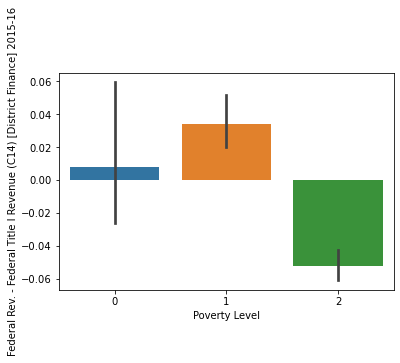

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

a = pd.DataFrame(years_15_16[rev_col[0]])
a[pov_col[0]] = y

sns.barplot(data=a, x=pov_col[0], y=rev_col[0])




Decision Tree

In [23]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier()
dtc.fit(xtrain, ytrain)

dtc.score(xtrain, ytrain), dtc.score(xtest,ytest)

(1.0, 0.7160850170558909)

In [24]:
plt.figure(figsize=(100,200))
tree.plot_tree(dtc)

[Text(1437.6838549534143, 10725.081081081082, 'X[7] <= -0.556\ngini = 0.659\nsamples = 15244\nvalue = [4411, 6132, 4701]'),
 Text(211.39283533326577, 10431.243243243243, 'X[9] <= -0.224\ngini = 0.172\nsamples = 2711\nvalue = [117, 133, 2461]'),
 Text(120.1475313915152, 10137.405405405405, 'X[18] <= 0.5\ngini = 0.111\nsamples = 2483\nvalue = [40, 104, 2339]'),
 Text(43.41868782061164, 9843.567567567568, 'X[22] <= 0.5\ngini = 0.028\nsamples = 1742\nvalue = [19, 6, 1717]'),
 Text(24.788953116496312, 9549.72972972973, 'X[0] <= -0.252\ngini = 0.023\nsamples = 1732\nvalue = [15, 5, 1712]'),
 Text(7.299814414673761, 9255.891891891892, 'X[10] <= 50.045\ngini = 0.003\nsamples = 1573\nvalue = [2, 0, 1571]'),
 Text(4.8665429431158405, 8962.054054054053, 'X[24] <= 0.5\ngini = 0.001\nsamples = 1572\nvalue = [1, 0, 1571]'),
 Text(2.4332714715579202, 8668.216216216217, 'gini = 0.0\nsamples = 1547\nvalue = [0, 0, 1547]'),
 Text(7.299814414673761, 8668.216216216217, 'X[13] <= 0.5\ngini = 0.077\nsamples